In [1]:
from llama_parse import LlamaParse
import pandas as pd
import PyPDF2
import nest_asyncio
import os
import tqdm
import math

nest_asyncio.apply()

In [2]:
df = pd.read_csv('data.csv')

In [3]:
def process(pdf_path):
    with open('../data/files/' + pdf_path, "rb") as file:
        leitor_pdf = PyPDF2.PdfReader(file)
        return len(leitor_pdf.pages)

df['page_count'] = df['file'].apply(process)
df.head()

,index,entidade,tipo,numero,complemento,ano,diario,publicacao,ementa,revogada,file,pdf_type,text,pdf_type_2,page_count,md_file
0,273,TRIBUNAL DE CONTAS DO ESTADO DO ACRE (LEGISLAT...,Acórdão,4716,2Âª CAMARA,2024,2220\n(Diário Eletrônico de Contas),02/02/2024,APOSENTADORIA. REGISTRO. SÃ?MULA-TCE/AC N. 02/...,Não,ELEGIS-1706994145601.PDF,Nato digital,TRIBUNAL DE CONTAS DO ESTADO DO ACRE \n \nMis...,Nato digital,6,files/ELEGIS-1706994145601.md
1,274,TRIBUNAL DE CONTAS DO ESTADO DO ACRE (LEGISLAT...,Acórdão,4717,2Âª CAMARA,2024,2220\n(Diário Eletrônico de Contas),02/02/2024,APOSENTADORIA. REGISTRO.,Não,ELEGIS-1706994198953.PDF,Nato digital,TRIBUNAL DE CONTAS DO ESTADO DO ACRE \n \nMis...,Nato digital,6,NaN
2,275,TRIBUNAL DE CONTAS DO ESTADO DO ACRE (LEGISLAT...,Acórdão,4718,2Âª CAMARA,2024,2220\n(Diário Eletrônico de Contas),02/02/2024,APOSENTADORIA POR INVALIDEZ. PROVENTOS INTEGRA...,Não,ELEGIS-1706994262695.PDF,Nato digital,TRIBUNAL DE CONTAS DO ESTADO DO ACRE \n \nMis...,Nato digital,6,NaN
3,276,TRIBUNAL DE CONTAS DO ESTADO DO ACRE (LEGISLAT...,Acórdão,4719,2Âª CAMARA,2024,2220\n(Diário Eletrônico de Contas),02/02/2024,APOSENTADORIA. REGISTRO.,Não,ELEGIS-1706994303326.PDF,Nato digital,TRIBUNAL DE CONTAS DO ESTADO DO ACRE \n \nMis...,Nato digital,6,NaN
4,277,TRIBUNAL DE CONTAS DO ESTADO DO ACRE (LEGISLAT...,Acórdão,4720,2Âª CAMARA,2024,2220\n(Diário Eletrônico de Contas),02/02/2024,APOSENTADORIA. REGISTRO. SÃ?MULA-TCE/AC N. 02/...,Não,ELEGIS-1706994357655.PDF,Nato digital,TRIBUNAL DE CONTAS DO ESTADO DO ACRE \n \nMis...,Nato digital,5,files/ELEGIS-1706994357655.md


In [5]:
df['page_count'].sum()

6144

<Axes: >

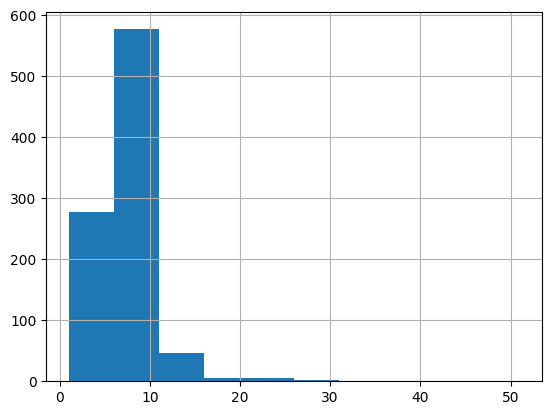

In [7]:
df['page_count'].hist()

In [9]:
parser = LlamaParse(
    api_key="llx-Ewky1i6v3MCKlr1q3zPfql7PK7jKcvbygg4hROlYXIghNCSE",
    result_type="markdown",
    num_workers=4,
    verbose=False,
    language="pt",
)

In [14]:
limit = 1000
current = 0
os.makedirs('md_files', exist_ok=True)

files_count = 0
pages_sum = 0
for p_count in df[df['md_file'].isna()].sort_values(by = 'page_count')['page_count'].tolist():
    pages_sum += p_count
    if pages_sum <= limit:
        files_count += 1
files_count

169

In [15]:
with tqdm.tqdm(total=files_count, smoothing=0.2) as pbar:
    for key, row in df[df['md_file'].isna()].sort_values(by = 'page_count').iterrows():
        current += row['page_count']
        if current <= limit:
            # Process document with LlamaParser
            file_path = 'files/' + row['file']
            document = parser.load_data(file_path)
            
            # Write a md_file with LlamaParser result
            md_path = file_path.replace('.PDF', '.md').replace('.pdf', '.md').replace('files/', 'md_files/')
            with open(md_path, 'a', encoding='utf-8') as md_file:
                for page in document:
                    md_file.write(page.text + '\n\n')
            
            df.loc[key, 'md_file'] = md_path
            df.to_csv('data.csv')
            pbar.update()
        else:
            break

 12%|█▏        | 21/169 [08:07<1:12:27, 29.38s/it]

Error while parsing the file '../data/files/ELEGIS-1724247042.pdf': 


 70%|██████▉   | 118/169 [47:05<17:39, 20.77s/it] 

Error while parsing the file '../data/files/ELEGIS-1722339960.pdf': 


 82%|████████▏ | 139/169 [53:18<08:11, 16.40s/it]

Error while parsing the file '../data/files/ELEGIS-1721233277.pdf': 


 86%|████████▌ | 145/169 [56:43<12:14, 30.61s/it]

Error while parsing the file '../data/files/ELEGIS-1721316704.pdf': 


 94%|█████████▍| 159/169 [1:02:09<03:26, 20.62s/it]

Error while parsing the file '../data/files/ELEGIS-1712516167968.PDF': Failed to parse the file: {"detail":"You've exceeded the maximum number of pages you can parse in a day (1000). Please contact support to increase your limit."}


 95%|█████████▍| 160/169 [1:02:10<02:30, 16.73s/it]

Error while parsing the file '../data/files/ELEGIS-1711999244669.PDF': Failed to parse the file: {"detail":"You've exceeded the maximum number of pages you can parse in a day (1000). Please contact support to increase your limit."}


 95%|█████████▌| 161/169 [1:02:11<01:48, 13.60s/it]

Error while parsing the file '../data/files/ELEGIS-1712508605870.PDF': Failed to parse the file: {"detail":"You've exceeded the maximum number of pages you can parse in a day (1000). Please contact support to increase your limit."}


 96%|█████████▌| 162/169 [1:02:12<01:17, 11.10s/it]

Error while parsing the file '../data/files/ELEGIS-1710974339641.PDF': Failed to parse the file: {"detail":"You've exceeded the maximum number of pages you can parse in a day (1000). Please contact support to increase your limit."}


 96%|█████████▋| 163/169 [1:02:13<00:54,  9.10s/it]

Error while parsing the file '../data/files/ELEGIS-1710974180084.PDF': Failed to parse the file: {"detail":"You've exceeded the maximum number of pages you can parse in a day (1000). Please contact support to increase your limit."}


 97%|█████████▋| 164/169 [1:02:14<00:37,  7.49s/it]

Error while parsing the file '../data/files/ELEGIS-1710974139669.PDF': Failed to parse the file: {"detail":"You've exceeded the maximum number of pages you can parse in a day (1000). Please contact support to increase your limit."}


 98%|█████████▊| 165/169 [1:02:16<00:24,  6.21s/it]

Error while parsing the file '../data/files/ELEGIS-1710974094057.PDF': Failed to parse the file: {"detail":"You've exceeded the maximum number of pages you can parse in a day (1000). Please contact support to increase your limit."}


 98%|█████████▊| 166/169 [1:02:17<00:15,  5.18s/it]

Error while parsing the file '../data/files/ELEGIS-1710973860289.PDF': Failed to parse the file: {"detail":"You've exceeded the maximum number of pages you can parse in a day (1000). Please contact support to increase your limit."}


 99%|█████████▉| 167/169 [1:02:18<00:08,  4.40s/it]

Error while parsing the file '../data/files/ELEGIS-1712509560704.PDF': Failed to parse the file: {"detail":"You've exceeded the maximum number of pages you can parse in a day (1000). Please contact support to increase your limit."}


 99%|█████████▉| 168/169 [1:02:19<00:22, 22.26s/it]

Error while parsing the file '../data/files/ELEGIS-1711999202648.PDF': Failed to parse the file: {"detail":"You've exceeded the maximum number of pages you can parse in a day (1000). Please contact support to increase your limit."}


In [17]:
for k, row in df.iterrows():
    if isinstance(row['md_file'], str):
        if '.PDF' in row['md_file'] or '.pdf' in row['md_file']:
            df.loc[k, 'md_file'] = row['md_file'].replace('.PDF', '.md').replace('.pdf', '.md')
            row['md_file'] = df.loc[k, 'md_file']
        with open(row['md_file'], 'r', encoding='utf-8') as file:
            if file.read().strip() == '':
                df.loc[k, 'md_file'] = None

In [18]:
len(df[~df['md_file'].isna()])

524

In [19]:
df.to_csv('data.csv', index=False)

In [86]:
for k, row in df.iterrows():
    if isinstance(row['md_file'], str):
        if '.pdf' in row['md_file']:
            os.rename(row['md_file'], row['md_file'].replace('.pdf', '.md'))
            df.loc[k, 'md_file'] = row['md_file'].replace('.pdf', '.md')